In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau

# Load your CSV data
data = pd.read_csv("/content/Ninapro DB1 17 Gestures.csv")

# Check if 'stimulus' column exists in your dataset
if 'stimulus' not in data.columns:
    print("The 'stimulus' column does not exist in your dataset. Please check your CSV file.")
else:
    # Define the gestures you want to train on (e.g., gestures 0, 1, 2, and 3)
    gestures_to_train = [2, 8, 10, 11]

    # Filter the data to only include the desired gestures
    data = data[data['stimulus'].isin(gestures_to_train)]

    # Reassign the labels
    le = LabelEncoder()
    data['stimulus'] = le.fit_transform(data['stimulus'])

    # Assuming 'stimulus' column contains the labels
    X = data.drop(columns=['stimulus']).values  # Features
    y = data['stimulus'].values                # Labels

    # Data preprocessing
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split the data into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Build a deep learning model with high complexity
    model = Sequential()
    model.add(Dense(units=2048, activation='relu', input_dim=11))  # Increase units
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Add multiple hidden layers with high units
    for _ in range(5):
        model.add(Dense(units=2048, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

    model.add(Dense(units=len(np.unique(y)), activation='softmax'))  # Output layer

    # Define learning rate scheduler
    def lr_schedule(epoch):
        if epoch < 20:
            return 0.001  # High learning rate initially
        else:
            return 0.0001  # Lower learning rate later

    # Implement learning rate reduction on plateau
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                  patience=5,
                                  min_lr=1e-7)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Define callbacks (early stopping, learning rate schedule, and reduce LR on plateau)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=15,
                               restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model for 300 epochs (increase epochs)
history = model.fit(X_train, y_train, epochs=300, batch_size=256, validation_data=(X_val,y_val), callbacks=[early_stopping, lr_scheduler, reduce_lr])



# Evaluate the model on the test set
test_loss,test_acc=model.evaluate(X_test,y_test)

print("Test accuracy:",test_acc)

# Save the trained model if needed
model.save('exercise_2_gestures_training.h5')  # Save as a new model

<ipython-input-1-7b00bd85e6ed>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stimulus'] = le.fit_transform(data['stimulus'])


Epoch 1/300
1524/1524 [==============================] - 36s 19ms/step - loss: 1.0701 - accuracy: 0.5370 - val_loss: 0.8117 - val_accuracy: 0.6459 - lr: 0.0010
Epoch 2/300
1524/1524 [==============================] - 29s 19ms/step - loss: 0.8400 - accuracy: 0.6373 - val_loss: 0.7094 - val_accuracy: 0.6955 - lr: 0.0010
Epoch 3/300
1524/1524 [==============================] - 29s 19ms/step - loss: 0.7650 - accuracy: 0.6735 - val_loss: 0.6485 - val_accuracy: 0.7263 - lr: 0.0010
Epoch 4/300
1524/1524 [==============================] - 29s 19ms/step - loss: 0.7175 - accuracy: 0.6963 - val_loss: 0.6045 - val_accuracy: 0.7449 - lr: 0.0010
Epoch 5/300
1524/1524 [==============================] - 28s 19ms/step - loss: 0.6900 - accuracy: 0.7095 - val_loss: 0.5900 - val_accuracy: 0.7472 - lr: 0.0010
Epoch 6/300
1524/1524 [==============================] - 29s 19ms/step - loss: 0.6627 - accuracy: 0.7220 - val_loss: 0.5626 - val_accuracy: 0.7650 - lr: 0.0010
Epoch 7/300
1524/1524 [=================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


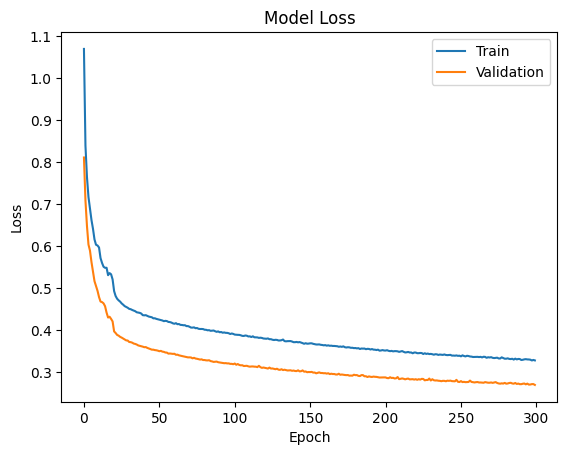

In [2]:
import matplotlib.pyplot as plt
#Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

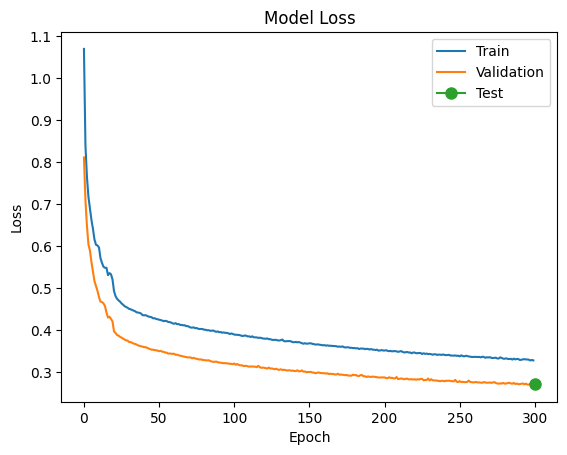

In [3]:
# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(len(history.history['loss']), test_loss, marker='o', markersize=8, label='Test Loss')  # Add test loss to the curve
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Test'], loc='upper right')
plt.show()

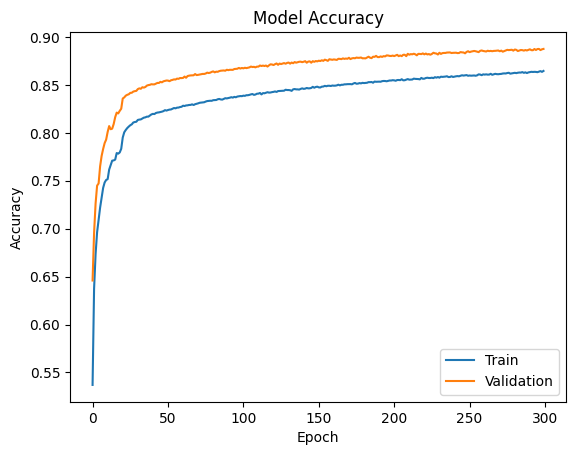

In [4]:
#Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

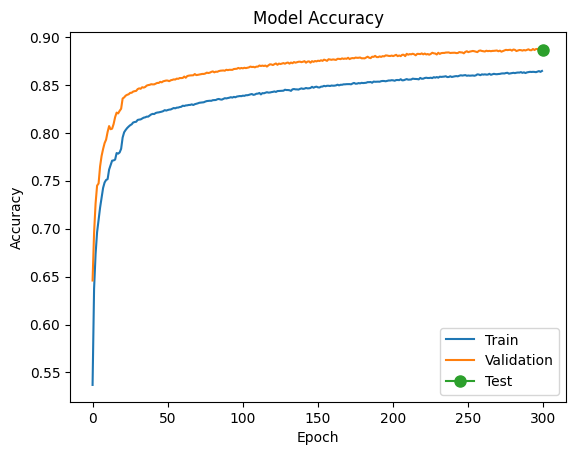

In [5]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(len(history.history['accuracy']), test_acc, marker='o', markersize=8, label='Test Accuracy')  # Add test accuracy to the curve
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation', 'Test'], loc='lower right')
plt.show()

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

In [7]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

2613/2613 [==============================] - 6s 2ms/step


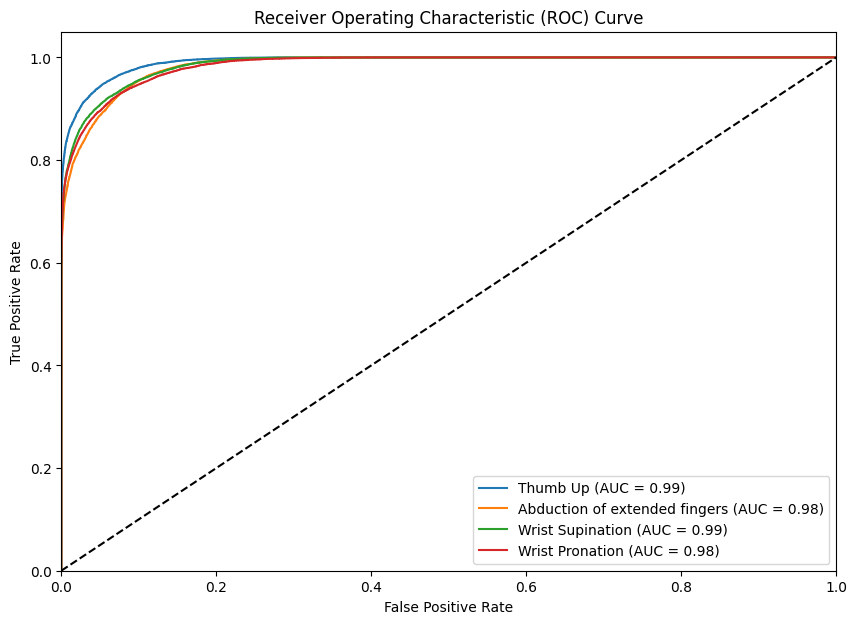

In [8]:
gesture_names = ['Thumb Up', 'Abduction of extended fingers', 'Wrist Supination', 'Wrist Pronation']

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    y_true = (y_test == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_true, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve with named gestures
plt.figure(figsize=(10, 7))
for i in range(len(np.unique(y_test))):
    # Ensure the index 'i' is within the range of gesture_names
    if i < len(gesture_names):
        plt.plot(fpr[i], tpr[i], label=f'{gesture_names[i]} (AUC = {roc_auc[i]:.2f})')
    else:
        print(f"Warning: No name specified for Gesture {i}")

# Plotting details
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [9]:
y_pred = (model.predict(X_test)[:, 1] > 0.5).astype("int32")


2613/2613 [==============================] - 6s 2ms/step


In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

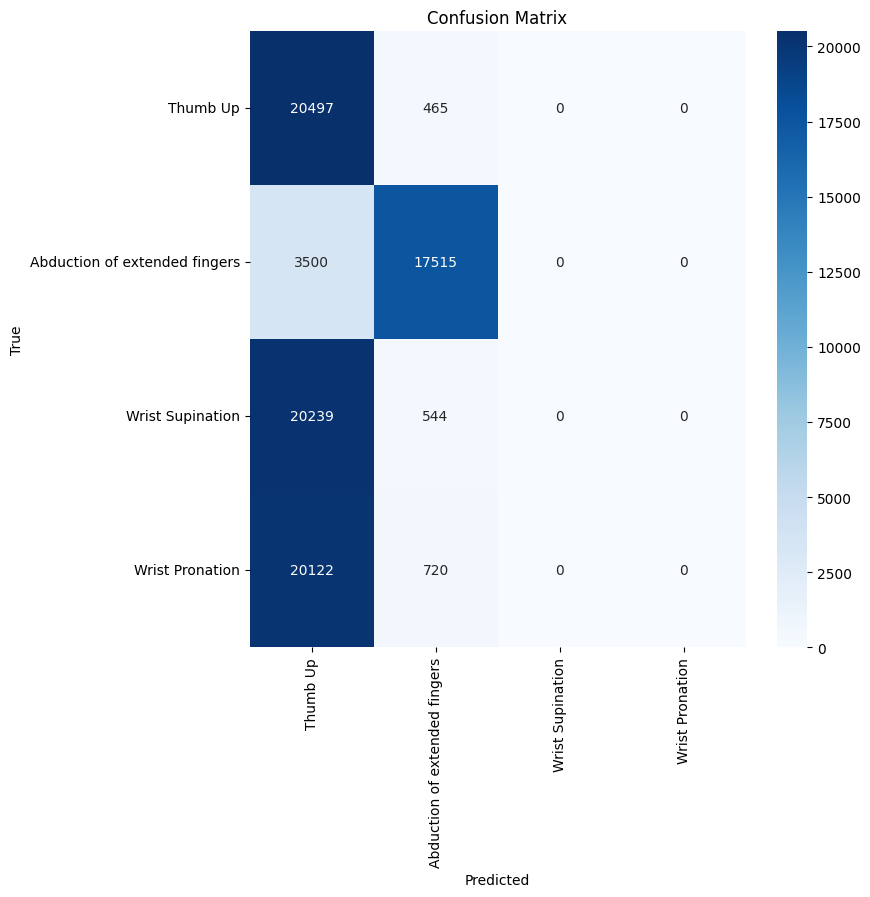

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert y_test to one-hot encoding if not already
from keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

# Calculate and plot confusion matrix using seaborn
cm = confusion_matrix(y_test_one_hot.argmax(axis=1), y_pred)

# Plotting confusion matrix with named gestures
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gesture_names, yticklabels=gesture_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


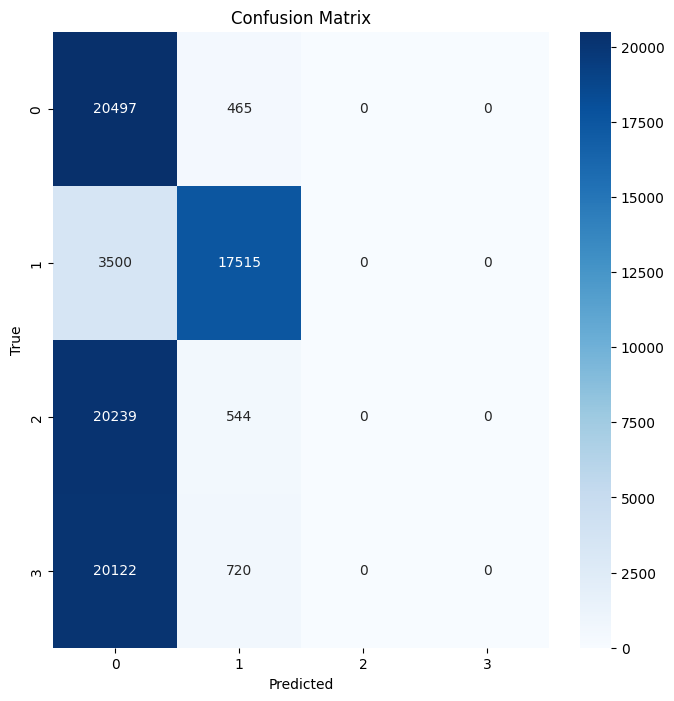

In [13]:
# Convert y_test to one-hot encoding if not already
from keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

# Calculate and plot confusion matrix using seaborn
cm = confusion_matrix(y_test_one_hot.argmax(axis=1), y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
